<a href="https://colab.research.google.com/github/EnnoMeijers/docs/blob/master/Copy_of_11_ISE_2020_ClimateData_Regression_HandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**To adapt this notebook to your own needs and to be able to edit it**, please make a copy of your own. This works via "File" -> "Save a copy ..."


---





In [Sect. 4.6 Basic ML Algorithms 2 - Linear Regression](https://www.slideshare.net/lysander07/11-ise2020-basic-machine-learning-2) of the ISE 2020 lecture we introduce the machine learning based predictions via linear regression. You will learn how to work with data and how to create a linear regression based model with the [scikit-learn machine learning library for python.](https://scikit-learn.org/stable/)


# **Set Up**

In [ ]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# **Get the Data**

**Dataset**

This example makes use of the [Climate Change: Earth Surface Temperature Dataset from Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data). It contains temperature measurements from 1750 to 2013, including date, latitide, longitude, etc. 

To keep our example feasible for a colaborative notebook, we have reduced the data to one city only: **Berlin**.
Furthermore, we have averaged the monthly measurements over the period of a year. Please [find the preprocessed dataset here.](https://docs.google.com/spreadsheets/d/13fMhrhouws3BFjCtZr15tT8h3JaCraQoziRT6U0Qk5s/edit?usp=sharing)

In [ ]:
#Prepare to read Data from Google Sheets
!pip install --upgrade -q gspread

#Authenticate with Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

#Read Google Spreadsheet as CSV into pandas DataFrame
import pandas as pd
berlin = pd.read_csv('https://docs.google.com/spreadsheets/d/' + '13fMhrhouws3BFjCtZr15tT8h3JaCraQoziRT6U0Qk5s' +
                   '/export?gid=2128087016&format=csv'
                  )
berlin.head(5) 

,date,year,12monthAverageTemperature,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1753-01-01,1753,8.715667,-2.452,7.998,Berlin,Germany,52.24N,13.14E
1,1754-01-01,1754,8.492833,-1.341,2.212,Berlin,Germany,52.24N,13.14E
2,1755-01-01,1755,8.261083,-6.032,6.072,Berlin,Germany,52.24N,13.14E
3,1756-01-01,1756,9.624833,2.619,6.380,Berlin,Germany,52.24N,13.14E
4,1757-01-01,1757,9.153667,-1.883,4.262,Berlin,Germany,52.24N,13.14E


By the way, we are using the **Python Data Analysis Library pandas**. If you are interested to learn more about pandas, you might have a look at this pandas tutorial: https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html

Now let's have a closer look on our data:

In [ ]:
berlin.describe()

,year,12monthAverageTemperature,AverageTemperature,AverageTemperatureUncertainty
count,261.00000,261.000000,261.000000,261.000000
mean,1883.00000,8.926965,-0.958330,2.059996
std,75.48841,0.848682,3.148366,2.603469
min,1753.00000,6.517167,-9.813000,0.097000
25%,1818.00000,8.358333,-2.892000,0.299000
50%,1883.00000,8.933667,-0.708000,0.714000
75%,1948.00000,9.472750,1.441000,2.930000
max,2013.00000,10.963667,5.973000,13.971000


All numerical data can be plotted in histograms, giving information about the distribution of values:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b44020f28>,
      dtype=object)

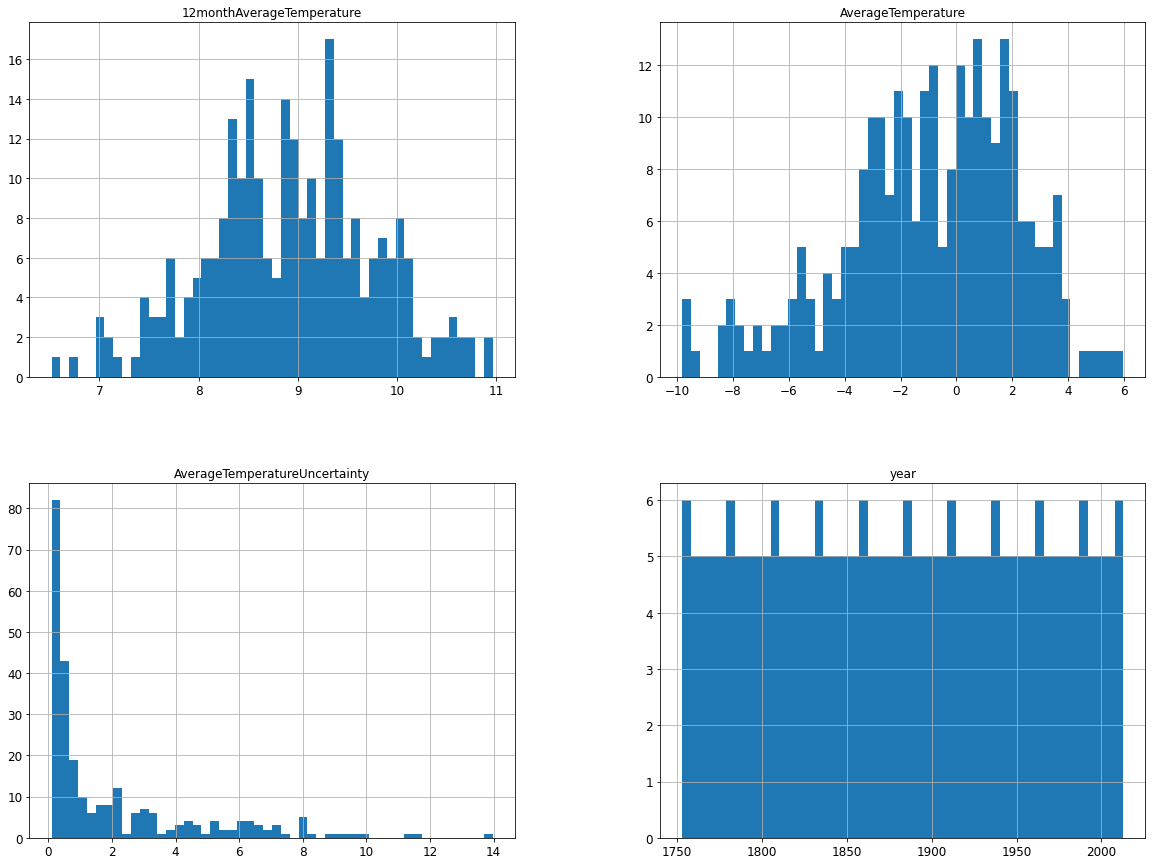

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
berlin.hist(bins=50, figsize=(20,15))

Now, what we really are interested in is the dependency of the 12 month average temperature and the year, to find out about the development of the temperature over time.

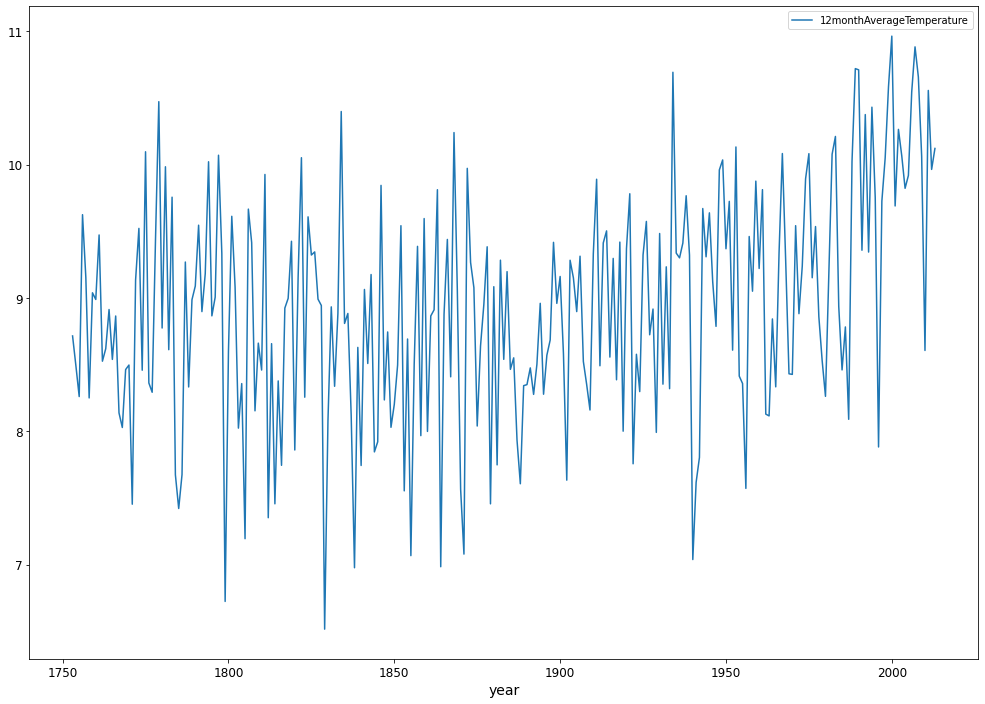

In [ ]:
berlin.plot(kind="line", x="year", y="12monthAverageTemperature", figsize=(17,12))

With **linear regression**, we may approximate a function for the prediction of temperatures for a given time.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create a linear regression model to approx temp over years
lin_reg = LinearRegression()
lin_reg.fit(berlin["year"].values.reshape(-1,1), berlin["12monthAverageTemperature"]) #fill in the data

#is there a correlation [-1;+1]?
cor = lin_reg.coef_
print("Correlation(year,temperature): %.5f" %cor)

Correlation(year,temperature): 0.00371


RMSE(linear): 0.7995


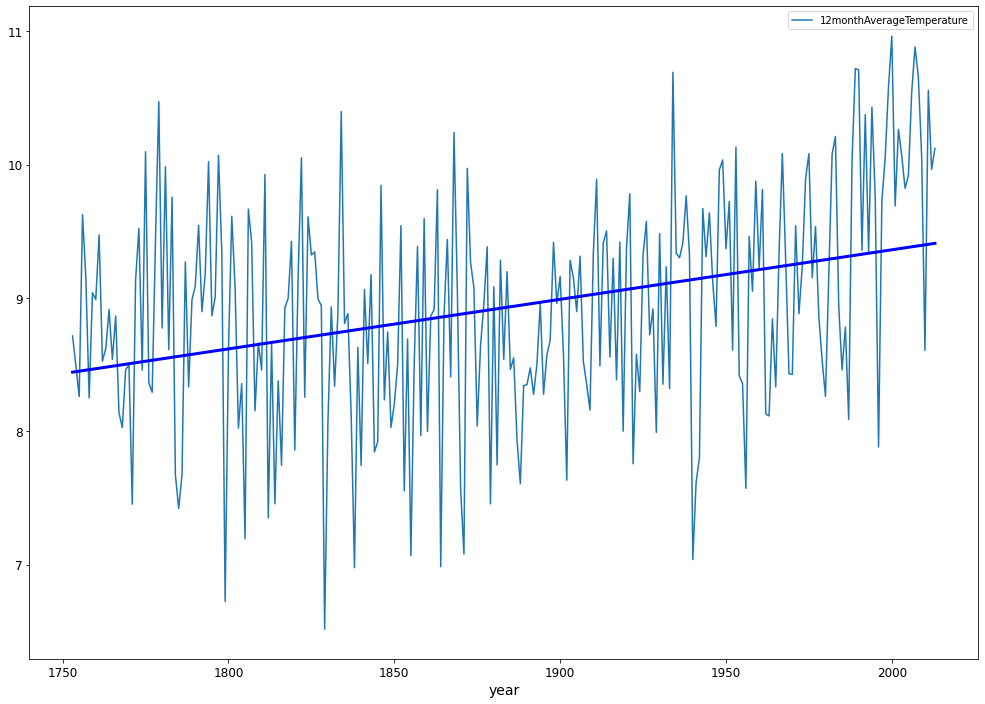

In [ ]:
#predict the temperature via linear regression
berlin_temp_pred = lin_reg.predict(berlin["year"].values.reshape(-1,1)) 

#plot the temperatures again
berlin.plot(kind="line", x="year", y="12monthAverageTemperature", figsize=(17,12))
#plot the predicted temperature values 
plt.plot(berlin["year"].values.reshape(-1,1), berlin_temp_pred, color='blue', linewidth=3)

# compute the mean squared error
lin_mse = mean_squared_error(berlin["12monthAverageTemperature"].values.reshape(-1,1), berlin_temp_pred)
lin_rmse = np.sqrt(lin_mse)
print("RMSE(linear): %.4f" %lin_rmse)

Now, let's see how well is the prediction by looking at the first 5 predicted temperature vs the first 5 real temperatures:

In [ ]:
print("Predictions:", berlin_temp_pred[:5])
print("Labels:", list(berlin["12monthAverageTemperature"][:5]))

Predictions: [8.44405466 8.44776936 8.45148405 8.45519875 8.45891344]
Labels: [8.715666667, 8.492833333, 8.261083333, 9.624833333, 9.153666667000001]


# **Next we try a non linear (polynomial) regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#use a polynomial regression with degree = 8
#for polynomial regression only the features have to be adapted to polynomial features (cf lecture)
poly_features = PolynomialFeatures(degree=8, include_bias=False)

berlin.sort_values(by=['12monthAverageTemperature'])
berlin_poly = poly_features.fit_transform(berlin["year"].values.reshape(-1,1))

#show the polynomial features
berlin_poly[0]

array([1.75300000e+03, 3.07300900e+06, 5.38698478e+09, 9.44338431e+12,
       1.65542527e+16, 2.90196050e+19, 5.08713675e+22, 8.91775073e+25])

RMSE(polynomial): 0.7551


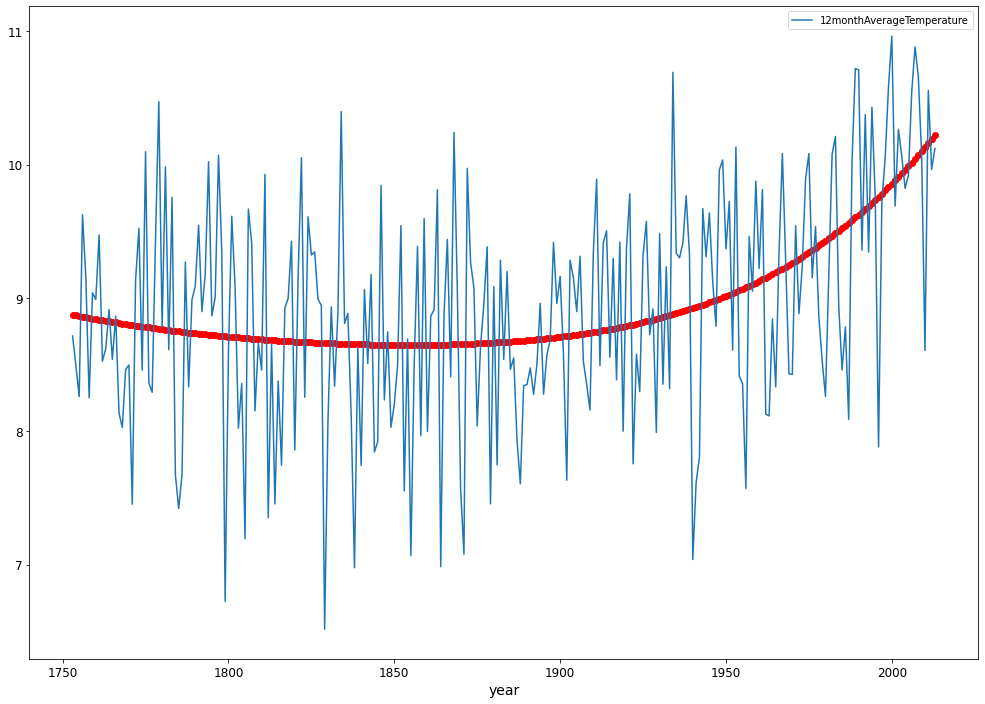

In [ ]:
#again we use linear regression, but with polynomial features
lin_reg = LinearRegression()
lin_reg.fit(berlin_poly, berlin["12monthAverageTemperature"])
berlin_temp_pred = lin_reg.predict(berlin_poly)

#plot the data first
berlin.plot(kind="line", x="year", y="12monthAverageTemperature", figsize=(17,12))
#then plot the predicted model
plt.scatter(berlin["year"].values.reshape(-1,1), berlin_temp_pred, color='red')

# compute the new mean squared error
lin_mse = mean_squared_error(berlin["12monthAverageTemperature"].values.reshape(-1,1), berlin_temp_pred)
lin_rmse = np.sqrt(lin_mse)
print("RMSE(polynomial): %.4f" %lin_rmse)